In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning, module='seaborn')
warnings.filterwarnings('ignore', category=UserWarning, module='seaborn')

In [3]:
sns.set_palette("viridis")

# Set a base style
sns.set_style("whitegrid")

# Customize specific style parameters
custom_params = {
    "axes.spines.right": False,
    "axes.spines.top": False,
    "axes.grid": True,
    "grid.linestyle": "--",
    "grid.color": "#cccccc",
    "axes.facecolor": "#f0f0f0",
    "axes.labelsize": 14,
    "axes.titlesize": 16,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12
}
sns.set_context("notebook", rc=custom_params)

# Get the Data 

### Download the Data

In [4]:
from pathlib import Path
import tarfile
import urllib.request

In [5]:
def load_housing_data():
    tarball_path = Path('datasets/housing.tgz')
    if not tarball_path.is_file():
        Path('datasets').mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz" 
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path='datasets')
    return pd.read_csv('datasets/housing/housing.csv')

```python
def load_housing_data():
```
This line defines a function named `load_housing_data` which doesn't take any parameters.

```python
    tarball_path = Path('datasets/housing.tgz')
```
This line creates a `Path` object representing the file path `datasets/housing.tgz`. The `Path` class is from the `pathlib` module, which provides an object-oriented interface for dealing with filesystem paths.

```python
    if not tarball_path.is_file():
```
This line checks if the file at `tarball_path` exists. If it does not exist, the following block of code will be executed.

```python
        Path('datasets').mkdir(parents=True, exist_ok=True)
```
This line creates the `datasets` directory if it doesn't already exist. The `parents=True` parameter allows the creation of parent directories as needed, and `exist_ok=True` prevents an error if the directory already exists.

```python
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
```
This line defines a variable `url` that stores the URL from which the housing dataset tarball can be downloaded.

```python
        urllib.request.urlretrieve(url, tarball_path)
```
This line downloads the file from the specified URL and saves it to the `tarball_path`. The `urlretrieve` function is from the `urllib.request` module.

```python
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path='datasets')
```
This block opens the tarball file and extracts all its contents into the `datasets` directory. The `with` statement ensures that the tarball file is properly closed after extraction.

```python
    return pd.read_csv('datasets/housing/housing.csv')
```
Finally, this line reads the CSV file `datasets/housing/housing.csv` into a Pandas DataFrame and returns it. The `pd.read_csv` function is from the `pandas` module, which is commonly used for data manipulation and analysis in Python.

In summary, this function checks if the housing data tarball exists locally. If not, it creates the necessary directories, downloads the tarball from a specified URL, extracts its contents, and then reads the housing data into a Pandas DataFrame, which it returns.

In [5]:
housing = pd.read_csv('datasets/housing/housing.csv')

## Take a Quick Look at the Data Structure

In [6]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
housing.shape

(20640, 10)

In [8]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [9]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [10]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [11]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


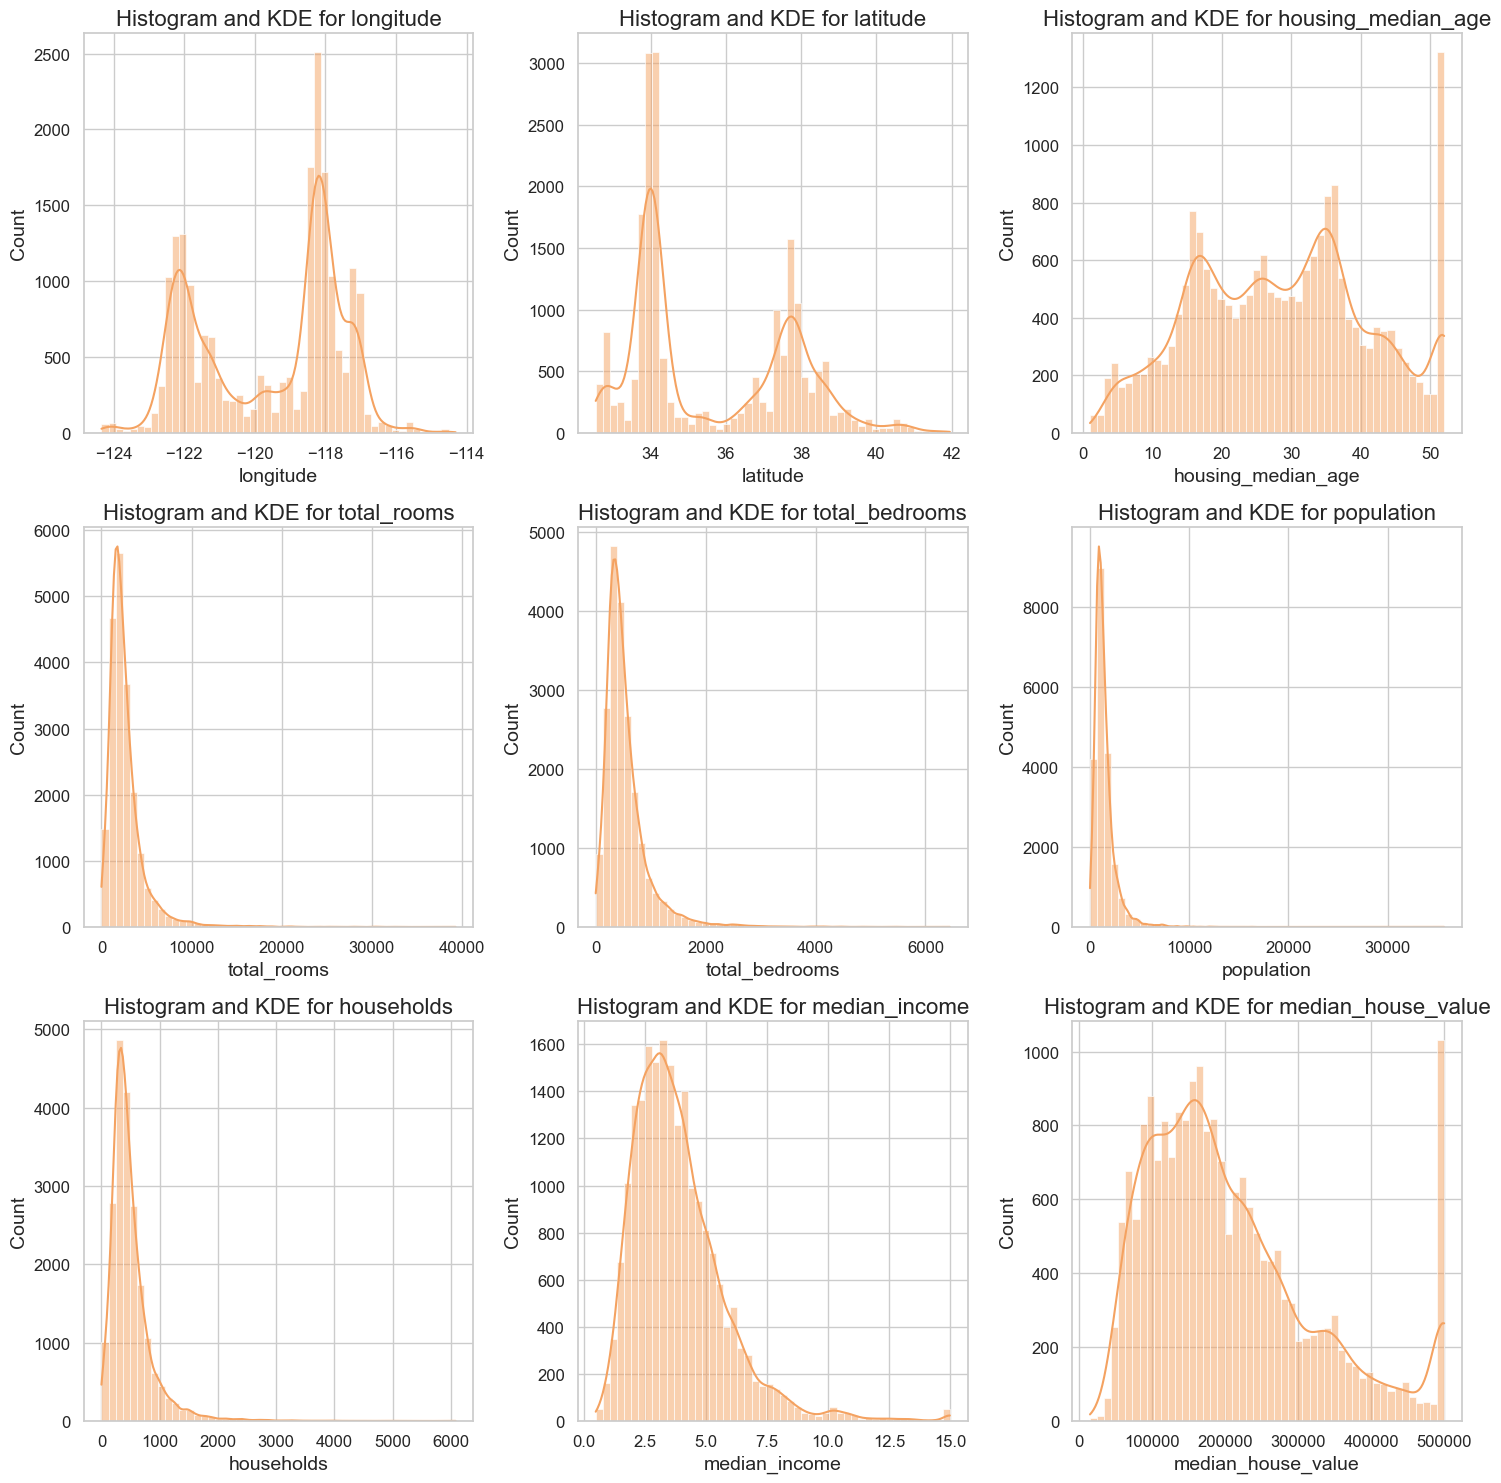

In [19]:
# Set up the figure for a 3x3 grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Plot each column in a separate subplot
for i, column in enumerate(housing.columns[:9]):  
    sns.histplot(housing[column], bins=50, kde=True, color='#f4a261', ax=axes[i])
    axes[i].set_title(f'Histogram and KDE for {column}')

plt.tight_layout()
plt.show()

In [34]:
# shows how to compute the 10.7% proba of getting a bad sample

from scipy.stats import binom

sample_size = 1000
ratio_female = 0.511
proba_too_small = binom(sample_size, ratio_female).cdf(485 - 1)
proba_too_large = 1 - binom(sample_size, ratio_female).cdf(535)
print(proba_too_small + proba_too_large)

0.10736798530929942


## Create a Test Set

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [22]:
train_set.shape

(16512, 10)

In [23]:
test_set.shape

(4128, 10)

In [24]:
housing['income_cat'] = pd.cut(housing['median_income'], bins=[0, 1.5, 3, 4.5, 6, np.inf],
                              labels=[1,2,3,4,5])

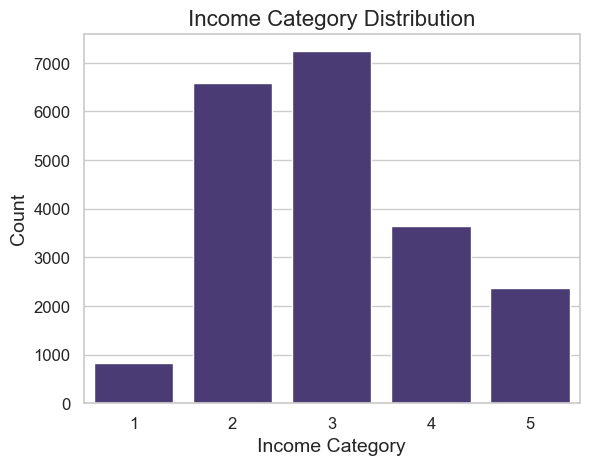

In [27]:
# Plot the bar chart
sns.barplot(x=housing['income_cat'].value_counts().index, 
            y=housing['income_cat'].value_counts().values)

# Set labels and title
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.title('Income Category Distribution')

plt.show()

In [28]:
from sklearn.model_selection import StratifiedShuffleSplit

In [19]:
splitter = StratifiedShuffleSplit(n_splits=10,random_state=42, test_size=0.2)
strat_splits = []
for train_index, test_index in splitter.split(housing, housing['income_cat']):
    strat_train_set_n = housing.iloc[train_index]
    strat_test_set_n = housing.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

### Step-by-Step Breakdown

1. **Initialize `StratifiedShuffleSplit`:**
   ```python
   splitter = StratifiedShuffleSplit(n_splits=10, random_state=42, test_size=0.2)
   ```
   - **`StratifiedShuffleSplit`**: This is a cross-validator provided by `scikit-learn`. It splits the dataset into training and test sets while preserving the percentage of samples for each class. This is useful when you have imbalanced classes and want to ensure that both the training and test sets are representative of the overall distribution.
   - **`n_splits=10`**: The dataset will be split 10 times, resulting in 10 different training and test sets.
   - **`random_state=42`**: Setting the random seed ensures reproducibility. Using the same random seed will produce the same splits every time you run the code.
   - **`test_size=0.2`**: 20% of the data will be used for testing, and the remaining 80% will be used for training.

2. **Prepare to Store Splits:**
   ```python
   strat_splits = []
   ```
   - An empty list `strat_splits` is created to store the training and test sets generated by the splitter.

3. **Perform Stratified Splitting:**
   ```python
   for train_index, test_index in splitter.split(housing, housing['income_cat']):
       strat_train_set_n = housing.iloc[train_index]
       strat_test_set_n = housing.iloc[test_index]
       strat_splits.append([strat_train_set_n, strat_test_set_n])
   ```
   - The `splitter.split(housing, housing['income_cat'])` method splits the `housing` dataset into training and test sets based on the `income_cat` column, ensuring that the distribution of `income_cat` is approximately the same in both sets.
   - **`for train_index, test_index in splitter.split(...)`**: This loop iterates over the indices of the training and test sets generated by `splitter.split(...)`.
     - **`train_index`**: Indices for the training set.
     - **`test_index`**: Indices for the test set.
   - **Extract Training and Test Sets:**
     ```python
     strat_train_set_n = housing.iloc[train_index]
     strat_test_set_n = housing.iloc[test_index]
     ```
     - The `.iloc[]` method is used to select the rows corresponding to `train_index` and `test_index` from the `housing` DataFrame, resulting in `strat_train_set_n` and `strat_test_set_n`.
   - **Store the Splits:**
     ```python
     strat_splits.append([strat_train_set_n, strat_test_set_n])
     ```
     - The training and test sets for this split are appended to the `strat_splits` list.

### Summary
This code creates 10 stratified splits of the `housing` dataset based on the `income_cat` column. Each split maintains the same distribution of `income_cat` in the training and test sets. The resulting splits are stored in the `strat_splits` list, where each element is a list containing a pair of DataFrames: the training set and the test set for that split. This approach ensures that your model will be trained and evaluated on representative subsets of the data, which is especially important for imbalanced datasets.

### short-cut

In [29]:
strat_train_set, strat_test_set = train_test_split(housing, test_size=0.2,
                                                  random_state=42, stratify=housing['income_cat'])

In [30]:
strat_test_set['income_cat'].value_counts() / strat_test_set.shape[0]

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [31]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True)

## Explore and Visualize the Data to Gain Insights

In [35]:
housing = strat_train_set.copy()

### Visualizing Geographical Data

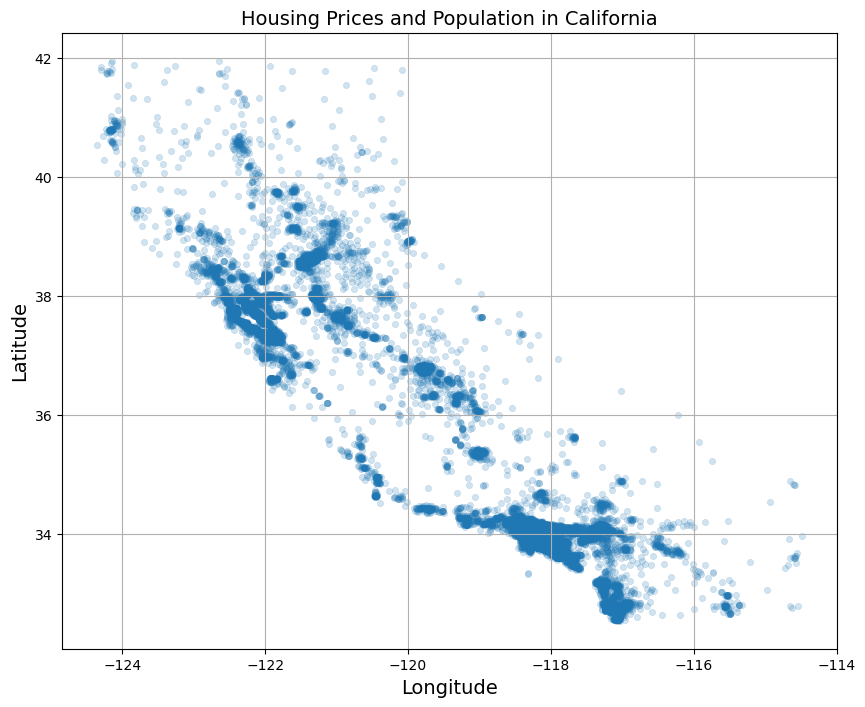

In [24]:
ax = housing.plot(kind='scatter',
            x='longitude',
            y='latitude',
            alpha=0.2,
            linewidth=0.5,
            figsize=(10, 8),
            grid=True)

# Adding labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Housing Prices and Population in California')

# Show plot
plt.show()

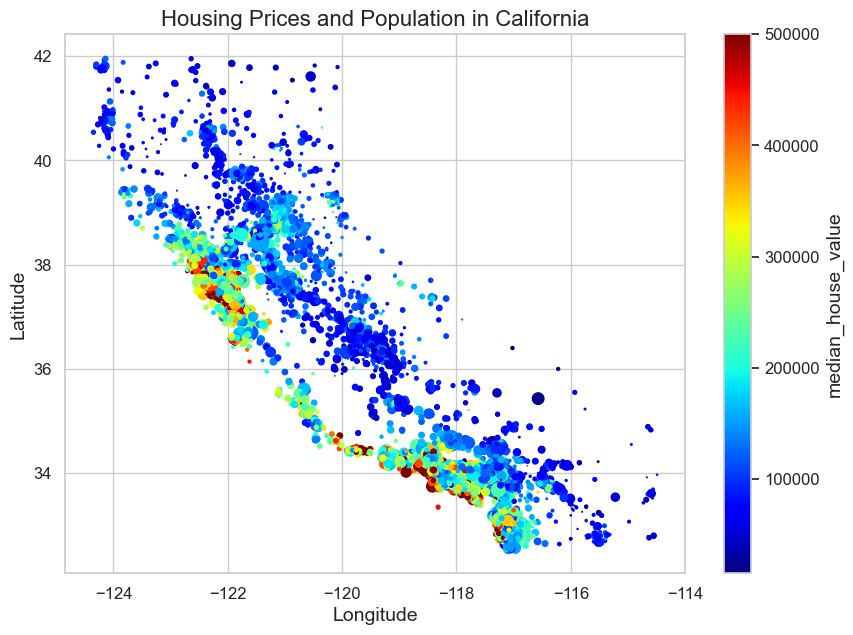

In [40]:
ax = housing.plot(kind='scatter',
            x = 'longitude',
            y = 'latitude',
            s = housing['population'] / 100,
            cmap='jet',
            c = 'median_house_value',
            colorbar = True,
            legend = True,
            grid = True,
            figsize = (10, 7))

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Housing Prices and Population in California')

# Show plot
plt.show()

### Look for Correlations

In [41]:
corr_matrix = housing.corr(numeric_only=True)

In [42]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

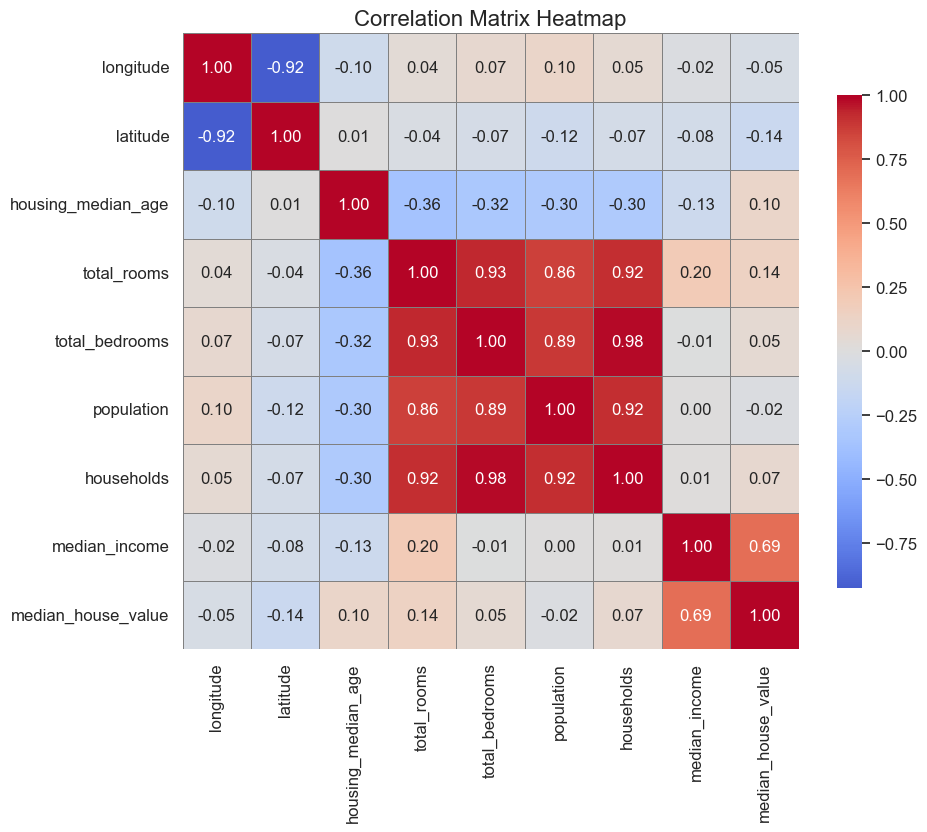

In [46]:
# Create the heatmap
plt.figure(figsize=(10, 8))  # Adjust figure size for clarity
sns.heatmap(corr_matrix, 
            annot=True,            # Display the correlation values
            fmt='.2f',            # Format the annotation to 2 decimal places
            cmap='coolwarm',      # Use a diverging color palette
            center=0,             # Center the colormap at 0
            square=True,          # Make cells square-shaped
            cbar_kws={"shrink": .8},  # Shrink the color bar
            linewidths=.5,        # Add lines between cells
            linecolor='gray')      # Color of lines between cells

# Customize the title
plt.title('Correlation Matrix Heatmap', fontsize=16)

# Show plot
plt.show()

In [47]:
from pandas.plotting import scatter_matrix

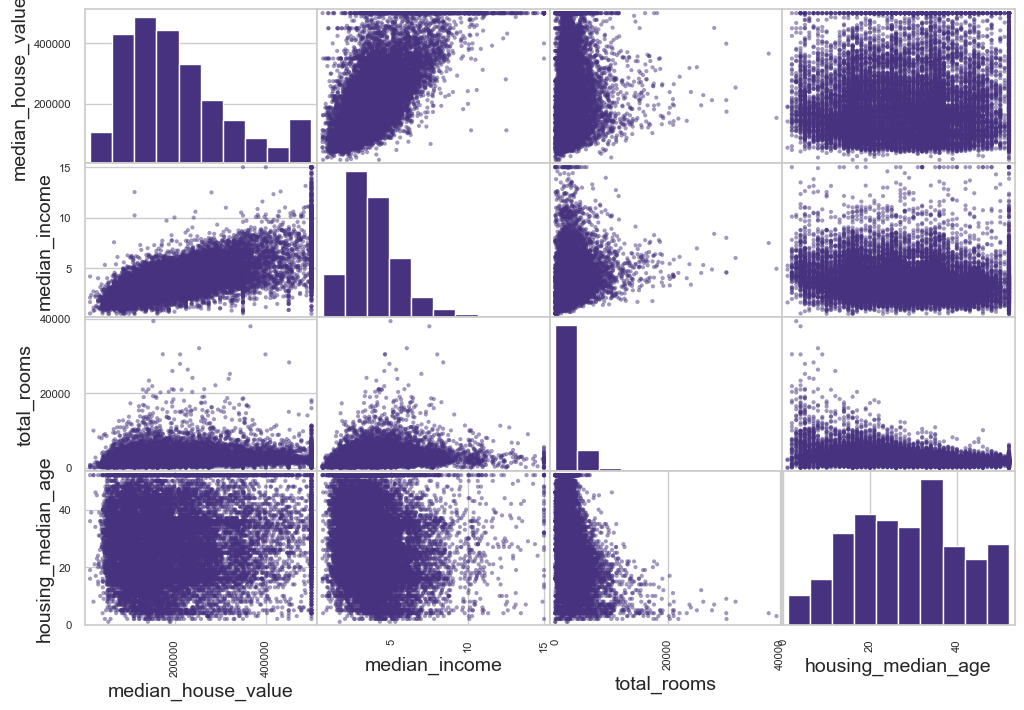

In [48]:
attributes = ['median_house_value',
             'median_income',
             'total_rooms',
             'housing_median_age']
scatter_matrix(housing[attributes],
              figsize=(12, 8))
plt.show()

### Experiment with Attribute Combinations

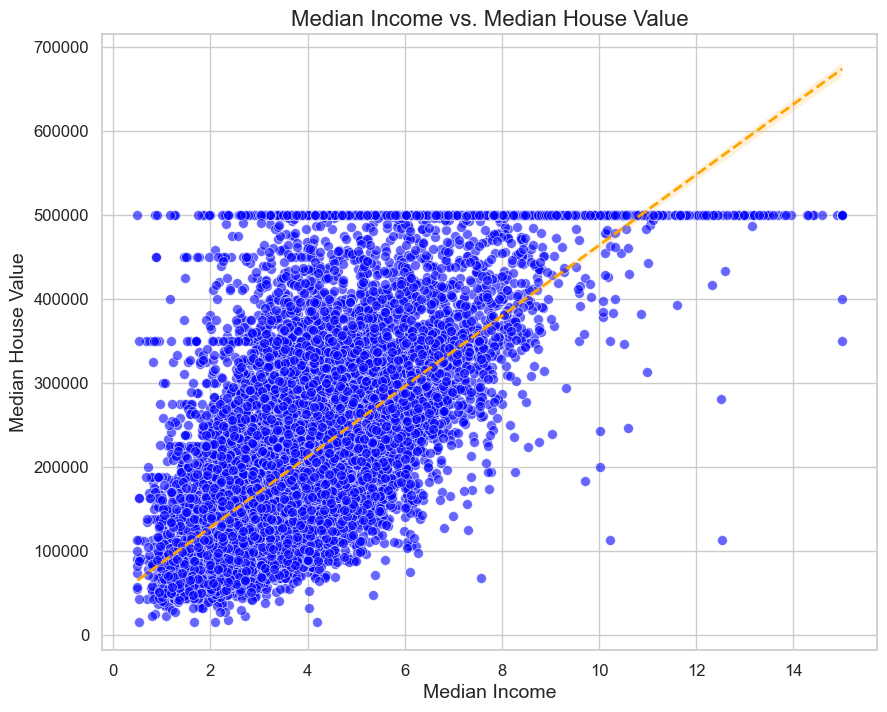

In [55]:
# Create scatter plot with enhancements
plt.figure(figsize=(10, 8))  # Set the figure size

# Scatter plot
sns.scatterplot(x='median_income', 
                y='median_house_value', 
                data=housing, 
                alpha=0.6,            # Add transparency to points
                color='blue',         # Set the color of points
                s=50,                 # Set the size of points
                edgecolor='w')        # Add white edges to points for distinction

# Optional: Add a regression line for better insight
sns.regplot(x='median_income', 
            y='median_house_value', 
            data=housing, 
            scatter=False,        # Disable the scatter plot in regplot
            color='orange', 
            line_kws={'linewidth': 2, 'linestyle': '--'})  # Customize line appearance

# Customize labels and title
plt.xlabel('Median Income', fontsize=14)
plt.ylabel('Median House Value', fontsize=14)
plt.title('Median Income vs. Median House Value', fontsize=16)

# Show plot
plt.grid(True)  # Optional: Add grid for better readability
plt.show()

In [56]:
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]

In [57]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
rooms_per_house       0.143663
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
people_per_house     -0.038224
longitude            -0.050859
latitude             -0.139584
bedrooms_ratio       -0.256397
Name: median_house_value, dtype: float64

## Prepare the Data for Machine Learning Algorithms

In [59]:
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

### Clean the Data

In [60]:
from sklearn.impute import SimpleImputer

In [61]:
imputer = SimpleImputer(strategy='median')

In [62]:
housing_num = housing.select_dtypes(include=[np.number])

In [63]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [64]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [65]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [40]:
X = imputer.transform(housing_num)

### Handling Text and Categorical Attributes

In [66]:
housing_cat = housing[['ocean_proximity']]

In [67]:
housing_cat.head(8)

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN
1286,INLAND
18078,<1H OCEAN
4396,NEAR BAY


In [68]:
from sklearn.preprocessing import OrdinalEncoder

In [44]:
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [45]:
housing_cat_encoded[:8]

array([[3.],
       [0.],
       [1.],
       [1.],
       [4.],
       [1.],
       [0.],
       [3.]])

In [46]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [69]:
from sklearn.preprocessing import OneHotEncoder

In [77]:
cat_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [78]:
housing_cat_1hot

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [72]:
# housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [75]:
cat_encoder.feature_names_in_

array(['ocean_proximity'], dtype=object)

In [76]:
cat_encoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

##  Feature Scaling and Transformation

In [79]:
from sklearn.preprocessing import MinMaxScaler

In [80]:
min_max_scaler = MinMaxScaler(feature_range=(-1,1))
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)

In [81]:
from sklearn.preprocessing import StandardScaler

In [82]:
std_scaler = StandardScaler()
housing_num_std_scaled = std_scaler.fit_transform(housing_num)

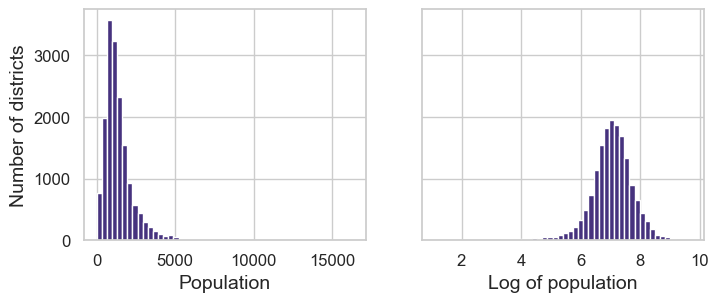

In [83]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
housing["population"].hist(ax=axs[0], bins=50)
housing["population"].apply(np.log).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("Population")
axs[1].set_xlabel("Log of population")
axs[0].set_ylabel("Number of districts")
plt.show()

In [84]:
from sklearn.metrics.pairwise import rbf_kernel

In [85]:
age_similer_35 = rbf_kernel(housing[['housing_median_age']], [[35]], gamma=0.1)

In [86]:
from sklearn.linear_model import LinearRegression

In [87]:
target_scaler = StandardScaler()
scaled_labels= target_scaler.fit_transform(housing_labels.to_frame())

In [88]:
model = LinearRegression()
model.fit(housing[['median_income']], scaled_labels)

LinearRegression()

In [89]:
some_new_data = housing[['median_income']].iloc[:5]

In [90]:
scaled_prediction = model.predict(some_new_data)
predictions = target_scaler.inverse_transform(scaled_prediction)

In [91]:
predictions

array([[131997.15275877],
       [299359.35844434],
       [146023.37185694],
       [138840.33653057],
       [192016.61557639]])

In [63]:
# shortcut
from sklearn.compose import TransformedTargetRegressor

model = TransformedTargetRegressor(LinearRegression(),
                                  transformer=StandardScaler())
model.fit(housing[['median_income']], housing_labels)
predictions = model.predict(some_new_data)

## Custom Transformers

In [92]:
from sklearn.preprocessing import FunctionTransformer

In [93]:
log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_pop = log_transformer.transform(housing[['population']])

In [94]:
from sklearn.metrics.pairwise import rbf_kernel 
age_simil_35 = rbf_kernel(housing[["housing_median_age"]], 
[[35]], gamma=0.1)

In [95]:
rbf_transformer = FunctionTransformer(rbf_kernel,
                                     kw_args=dict(Y = [[35.]], gamma=0.1))
age_simil_35 = rbf_transformer.transform(housing[["housing_median_age"]])

In [98]:
sf_coords = 37.7749, -122.41
sf_transformed = FunctionTransformer(rbf_kernel, kw_args=dict(Y = [sf_coords], gamma = 0.1))
sf_simil = sf_transformed.transform(housing[['latitude', 'longitude']])